In [1]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

In [2]:
import numpy as np

from datetime import timedelta
from datetime import datetime
from pprint import pprint

from opendrift.models.oceandrift import OceanDrift
from opendrift.models.oceandrift import Lagrangian3DArray
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_global_landmask
from opendrift.readers import reader_shape

In [3]:
data = reader_netCDF_CF_generic.Reader('/data/global-reanalysis-phy-001-030-daily/05_500m_regrid_joined/grid_2017.nc')
# data2 = reader_netCDF_CF_generic.Reader('/data/global-reanalysis-phy-001-030-daily/05_500m_regrid_joined/grid_1994.nc')
reader_costao = reader_shape.Reader.from_shpfiles('/data/shapefiles/costoes/pol_diferenca_costao_terra.shp')
sh_t = reader_shape.Reader
sh_t.variables = ['land_bainary_mask', 'exposicao', 'lala']
reader_teste = sh_t.from_shpfiles('/data/shapefiles/costoes/teste_exposicao.shp')

In [5]:
import pyproj
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

class OceanDrift2(OceanDrift):
    def get_reader_mask(self, reader_name, domain, time):
        reader = self.readers[reader_name]
        
        xmin, xmax, ymin, ymax = domain
        cornerlons = np.array([xmin, xmin, xmax, xmax])
        cornerlats = np.array([ymin, ymax, ymin, ymax])
        reader_x, reader_y = reader.lonlat2xy(cornerlons, cornerlats)
        print(reader_x)
        print(reader_y)
        if sum(~np.isfinite(reader_x+reader_y)) > 0:
            # Axis corner points are not within reader domain
            reader_x = np.array([reader.xmin, reader.xmax])
            reader_y = np.array([reader.ymin, reader.ymax])
        else:
            reader_x = np.linspace(reader_x.min(), reader_x.max(), 10)
            reader_y = np.linspace(reader_y.min(), reader_y.max(), 10)

        data = reader.get_variables('land_binary_mask', time, reader_x, reader_y, None)
        return data

In [6]:
o = OceanDrift2(loglevel=20)
o.add_reader([data, reader_teste])

17:38:01 INFO: OpenDriftSimulation initialised (version 1.4.2)


In [7]:
dir(reader_teste.polys[0])

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_crs',
 '_ctypes_data',
 '_exterior',
 '_geom',
 '_get_coords',
 '_interiors',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',
 'distance',
 'empty',
 'envelope',
 'equals',
 'equals_exact',
 'exterior',
 'from_bounds

In [12]:
# import json
# from shapely.geometry import mapping, shape
# print(json.dumps(mapping(reader_teste.polys[0])))
from cartopy import io
import itertools
reader = io.shapereader.Reader('/data/shapefiles/costoes/pol_diferenca_costao_terra_p14.shp')
# dir(reader.geometries())
reader._data

[{'geometry': <shapely.geometry.polygon.Polygon at 0x7f9de6731850>,
  'id': '3014',
  'level': 1,
  'source': 'WVS',
  'parent_id': -1,
  'sibling_id': -1,
  'area': 30.7408725022},
 {'geometry': <shapely.geometry.polygon.Polygon at 0x7f9de682f090>,
  'id': '50585',
  'level': 1,
  'source': 'WVS',
  'parent_id': -1,
  'sibling_id': -1,
  'area': 0.248162793627},
 {'geometry': <shapely.geometry.multipolygon.MultiPolygon at 0x7f9e4819dfd0>,
  'id': '3',
  'level': 1,
  'source': 'WVS',
  'parent_id': -1,
  'sibling_id': -1,
  'area': 17534164.0668},
 {'geometry': <shapely.geometry.multipolygon.MultiPolygon at 0x7f9de682f810>,
  'id': '577',
  'level': 1,
  'source': 'WVS',
  'parent_id': -1,
  'sibling_id': -1,
  'area': 431.05304273},
 {'geometry': <shapely.geometry.multipolygon.MultiPolygon at 0x7f9de680d110>,
  'id': '791',
  'level': 1,
  'source': 'WVS',
  'parent_id': -1,
  'sibling_id': -1,
  'area': 276.959396335},
 {'geometry': <shapely.geometry.polygon.Polygon at 0x7f9de6995f9

In [17]:

# o.add_reader([data])
start = datetime(2017, 1, 1, 12, 0, 0)
seed_rn = [-48.374985, -27.277734]
seed_gi = [-48.40758, -27.17785]
seed_eg = [-48.367384, -27.291957]
seed_sv = [-48.360013, -27.297548]
seeded = [-48.395993, -27.294177]
o.seed_elements(lon=seeded[0], lat=seeded[1], number=50, radius=50, time=[start, start+timedelta(hours=2)])
o.set_config('general:coastline_action', 'stranding')
o.set_config('general:use_auto_landmask', False)
# o.run(duration=timedelta(hours=25), time_step=450, time_step_output=3600)

22:28:49 INFO: OpenDriftSimulation initialised (version 1.4.2)
22:28:49 INFO: Fallback values will be used for the following variables which have no readers: 
22:28:49 INFO: 	x_wind: 0.000000
22:28:49 INFO: 	y_wind: 0.000000
22:28:49 INFO: 	upward_sea_water_velocity: 0.000000
22:28:49 INFO: 	ocean_vertical_diffusivity: 0.000000
22:28:49 INFO: 	sea_surface_wave_significant_height: 0.000000
22:28:49 INFO: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
22:28:49 INFO: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
22:28:49 INFO: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
22:28:49 INFO: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
22:28:49 INFO: 	surface_downward_x_stress: 0.000000
22:28:49 INFO: 	surface_downward_y_stress: 0.000000
22:28:49 INFO: 	turbulent_kinetic_energy: 0.000000
22:28:49 INFO: 	turbulent_generic_length_scale: 0.000000
22:28:49 INFO: 	sea_floor_depth_below_sea_level: 10000.000000
22:

22:28:50 INFO: 2017-01-01 22:00:00 - step 81 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:07:30 - step 82 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:15:00 - step 83 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:22:30 - step 84 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:30:00 - step 85 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:37:30 - step 86 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:45:00 - step 87 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 22:52:30 - step 88 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 23:00:00 - step 89 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 23:07:30 - step 90 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-01-01 23:15:00 - step 91 of 200 - 50 active elements (0 deactivated)
22:28:50 INFO: 2017-0

22:28:52 INFO: 2017-01-02 09:22:30 - step 172 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 09:30:00 - step 173 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 09:37:30 - step 174 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 09:45:00 - step 175 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 09:52:30 - step 176 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:00:00 - step 177 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:07:30 - step 178 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:15:00 - step 179 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:22:30 - step 180 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:30:00 - step 181 of 200 - 11 active elements (39 deactivated)
22:28:52 INFO: 2017-01-02 10:37:30 - step 182 of 200 - 11 active elements (39 deactivated)

<IPython.core.display.Javascript object>


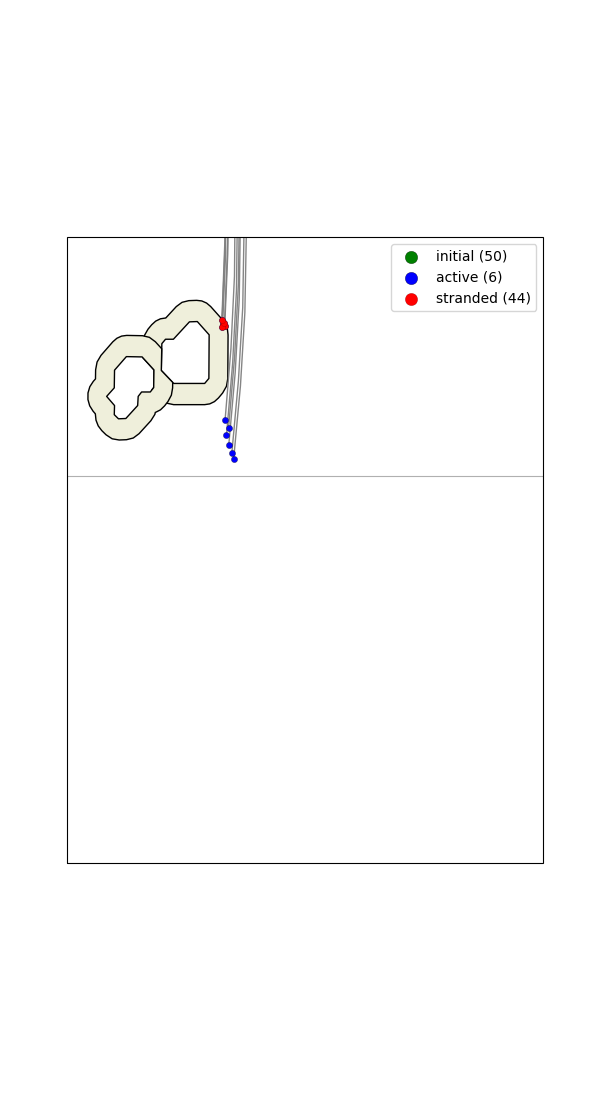

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift2\n2017-01-01 12:00 to 2017-01-02 13:00 UTC (26 steps)'}>,
 <module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>)

In [18]:
domain = [-48.7, -48.2, -27.8, -27]

# mask_grid = o.get_reader_mask('shape', domain, data.start_time)
# print(mask_grid)
o.plot(corners=domain)

In [8]:
shape = o.readers['/data/global-reanalysis-phy-001-030-daily/05_500m_regrid_joined/grid_2017.nc']

In [10]:
shape.lon

array([-49.        , -48.99538889, -48.99077778, -48.98616667,
       -48.98155556, -48.97694444, -48.97233333, -48.96772222,
       -48.96311111, -48.9585    , -48.95388889, -48.94927778,
       -48.94466667, -48.94005556, -48.93544444, -48.93083333,
       -48.92622222, -48.92161111, -48.917     , -48.91238889,
       -48.90777778, -48.90316667, -48.89855556, -48.89394444,
       -48.88933333, -48.88472222, -48.88011111, -48.8755    ,
       -48.87088889, -48.86627778, -48.86166667, -48.85705556,
       -48.85244444, -48.84783333, -48.84322222, -48.83861111,
       -48.834     , -48.82938889, -48.82477778, -48.82016667,
       -48.81555556, -48.81094444, -48.80633333, -48.80172222,
       -48.79711111, -48.7925    , -48.78788889, -48.78327778,
       -48.77866667, -48.77405556, -48.76944444, -48.76483333,
       -48.76022222, -48.75561111, -48.751     , -48.74638889,
       -48.74177778, -48.73716667, -48.73255556, -48.72794444,
       -48.72333333, -48.71872222, -48.71411111, -48.70

In [79]:
o.environment.land_binary_mask

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
__on_land__